In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a list of geocoordinates
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-90,90, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates[0:5]

[(-40.620225850296706, 10.728149154085315),
 (49.53525875659227, -29.70575635782741),
 (74.64875569329348, 66.46180132011574),
 (-44.04091619132743, 43.121444532023276),
 (31.716798517809366, -60.206315219108276)]

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=30923c399bf723bf4ea9f6a3a706359f


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=30923c399bf723bf4ea9f6a3a706359f&q=Boston


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 65.28,
  'feels_like': 56.32,
  'temp_min': 63,
  'temp_max': 66.99,
  'pressure': 996,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 18.34, 'deg': 280, 'gust': 29.97},
 'clouds': {'all': 1},
 'dt': 1598776525,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1598782080,
  'sunset': 1598829712},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1598782080,
 'sunset': 1598829712}

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 66.99 68 1 18.34


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 8, 30, 8, 35, 25)

In [13]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-08-30 08:35:25'

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

In [20]:
for i, item in enumerate(list):

SyntaxError: unexpected EOF while parsing (<ipython-input-20-82d1cc5f1328>, line 1)

In [27]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 45 of Set 23 | cape town
Processing Record 46 of Set 23 | lagoa
Processing Record 47 of Set 23 | amderma
City not found. Skipping...
Processing Record 48 of Set 23 | margate
Processing Record 49 of Set 23 | saint george
Processing Record 50 of Set 23 | narsaq
Processing Record 51 of Set 23 | wattegama
Processing Record 52 of Set 23 | la rioja
Processing Record 53 of Set 23 | qaanaaq
Processing Record 54 of Set 23 | saint-philippe
Processing Record 55 of Set 23 | coquimbo
Processing Record 56 of Set 23 | upernavik
Processing Record 57 of Set 23 | barentsburg
City not found. Skipping...
Processing Record 58 of Set 23 | illoqqortoormiut
City not found. Skipping...
Processing Record 59 of Set 23 | urdzhar
City not found. Skipping...
Processing Record 60 of Set 23 | hermanus
Processing Record 61 of Set 23 | bam
Processing Record 62 of Set 23 | aleppo
Processing Record 63 of Set 23 | port alfred
Processing Record 64 of Set 23 | gornopravdinsk
Processing Record 65 of Set 23 

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pertuis,43.69,5.50,68.00,60,0,14.99,FR,2020-08-30 08:47:17
1,Pertuis,43.69,5.50,68.00,60,0,14.99,FR,2020-08-30 08:47:17
2,Cape Town,-33.93,18.42,53.01,71,20,2.24,ZA,2020-08-30 08:50:44
3,Lagoa,39.05,-27.98,73.63,95,12,9.33,PT,2020-08-30 08:50:45
4,Margate,51.38,1.39,62.01,81,97,4.00,GB,2020-08-30 08:50:45
5,Saint George,37.10,-113.58,82.00,30,1,13.87,US,2020-08-30 08:50:45
6,Narsaq,60.92,-46.05,59.00,33,75,20.80,GL,2020-08-30 08:50:45
7,Wattegama,6.80,81.48,95.00,53,40,14.99,LK,2020-08-30 08:50:46
8,La Rioja,42.25,-2.50,61.00,59,40,14.99,ES,2020-08-30 08:50:46
9,Qaanaaq,77.48,-69.36,29.70,78,0,5.59,GL,2020-08-30 08:50:46


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/30/20'

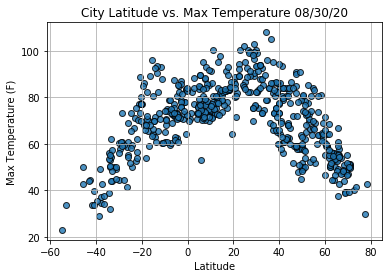

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

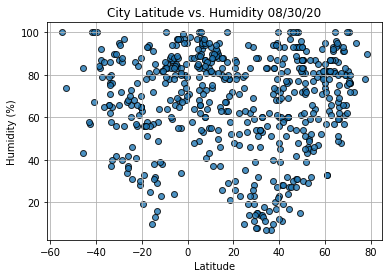

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

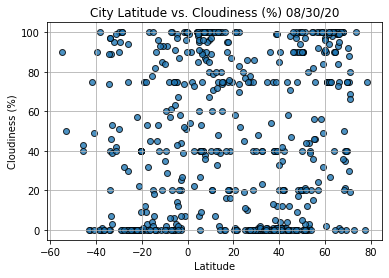

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

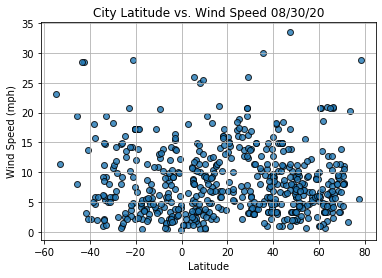

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()